In [1]:
import pandas as pd
#Importing all required libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

#Plotting Plots
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
import pandas as pd
df = pd.read_csv("/Users/Arjun D H/Documents/gogleplayapps.csv",engine='python',encoding='utf-8')

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df.shape

(10841, 13)

In [7]:
App = df['App'].dropna()

In [8]:
App = App.tolist() 

In [9]:
print(App[0])

Photo Editor & Candy Camera & Grid & ScrapBook


In [10]:
print(len(App))

10841


In [11]:
def findCategory(Category):
    requiredCategory = []
    for i in Category:
        if(Category in i):
            requiredCategory.append(i)
    return(len(Category))  

In [12]:
findCategory("ART_AND_DESIGN")

14

In [13]:
top5Category = df['Category'].value_counts()
top5Category[0:5]

FAMILY      1972
GAME        1144
TOOLS        843
MEDICAL      463
BUSINESS     460
Name: Category, dtype: int64

In [14]:
top10Genres = df['Genres'].value_counts()
top10Genres[0:10]

Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    392
Communication      387
Lifestyle          381
Name: Genres, dtype: int64

In [15]:
top10App = df['App'].value_counts()
top10App[0:10]

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
8 Ball Pool                                          7
ESPN                                                 7
Bubble Shooter                                       6
Helix Jump                                           6
Nick                                                 6
Subway Surfers                                       6
Name: App, dtype: int64

In [17]:
top5App = df['App'].value_counts()
top5App = top5App[0:5]
print(type(top5App))

<class 'pandas.core.series.Series'>


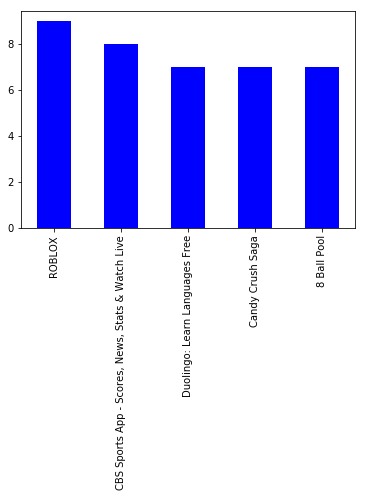

In [18]:
top5App.plot.bar(stacked=True, colormap='winter')

In [19]:
diffApp= df['App'].dropna()

In [20]:
diffApp.value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
Bubble Shooter                                        6
Helix Jump                                            6
Nick                                                  6
Subway Surfers                                        6
Zombie Catchers                                       6
Bowmasters                                            6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
slither.io                                            6
Temple Run 2                                          6
Bleacher Report: sports news, scores, & highlights    6
eBay: Buy & Sell this Summer - Discover Deals Now!    5
Viber Messenger                                 

In [21]:
dfGenres= df['Genres'].value_counts()
dfGenres = dfGenres[0:10]

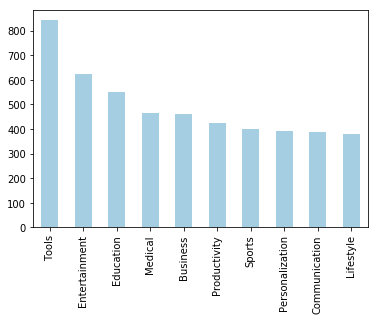

In [22]:
dfGenres.plot.bar(stacked=True, colormap='Paired')

# Analysis of App Data

In [23]:
App= df['App'].dropna()

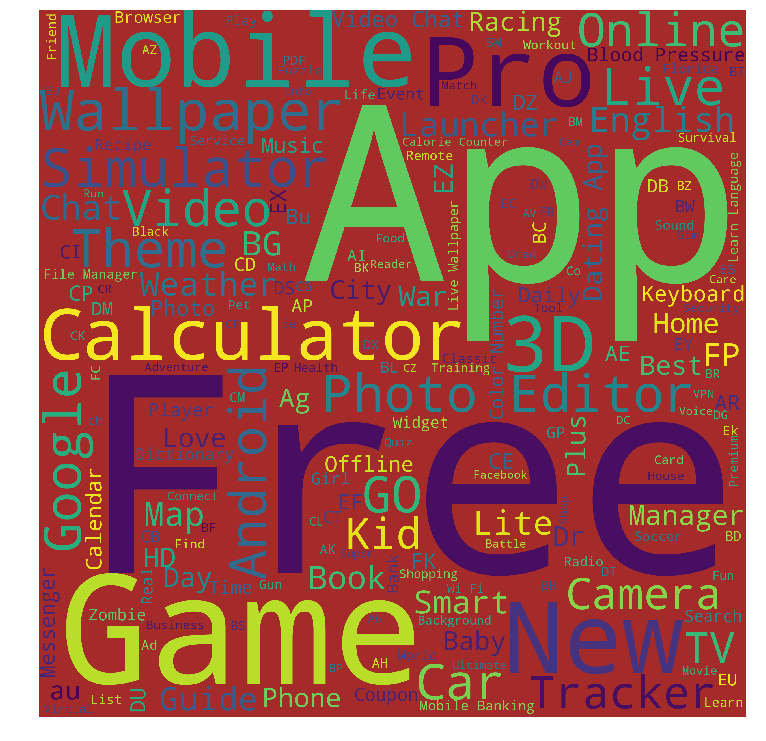

In [24]:
from wordcloud import WordCloud, STOPWORDS

def showWordCloud(data):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = 'brown',
                         width = 2500,
                         height = 2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize = (13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

showWordCloud(App)

In [25]:
App = App.tolist()

In [26]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [27]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(App))

print(data_words[:1])

[['photo', 'editor', 'candy', 'camera', 'grid', 'scrapbook']]


In [28]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['photo', 'editor', 'candy', 'camera', 'grid', 'scrapbook']


In [29]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [30]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:4])

[['photo', 'editor', 'candy', 'camera', 'grid', 'scrapbook'], ['coloring_book', 'moana'], ['launcher', 'lite', 'theme', 'app'], ['paint']]


In [31]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]]


In [32]:
id2word[0]

'camera'

In [33]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

[[('camera', 1),
  ('candy', 1),
  ('editor', 1),
  ('grid', 1),
  ('photo', 1),
  ('scrapbook', 1)],
 [('coloring_book', 1), ('moana', 1)],
 [('app', 1), ('launcher', 1), ('lite', 1), ('theme', 1)]]

# Build LDA Model for App Data

In [34]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [35]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.021*"photo" + 0.016*"war" + 0.016*"dictionary" + 0.014*"camera" + '
  '0.012*"editor" + 0.012*"fr" + 0.012*"maker" + 0.011*"list" + '
  '0.011*"florida" + 0.011*"download"'),
 (1,
  '0.028*"manager" + 0.026*"facebook" + 0.017*"car" + 0.015*"hospital" + '
  '0.015*"fr" + 0.014*"radio" + 0.014*"weather" + 0.010*"tv" + 0.010*"florida" '
  '+ 0.009*"guide"'),
 (2,
  '0.037*"wallpaper" + 0.036*"news" + 0.021*"fr" + 0.014*"map" + 0.012*"gold" '
  '+ 0.011*"note" + 0.011*"florida" + 0.009*"beach" + 0.008*"banking" + '
  '0.008*"bank"'),
 (3,
  '0.051*"game" + 0.048*"app" + 0.032*"theme" + 0.028*"simulator" + '
  '0.022*"truck" + 0.017*"doctor" + 0.013*"lite" + 0.010*"kid" + '
  '0.010*"launcher" + 0.010*"driver"'),
 (4,
  '0.038*"calculator" + 0.030*"video" + 0.028*"mobile" + 0.020*"surgery" + '
  '0.015*"lottery" + 0.015*"poker" + 0.013*"chat" + 0.013*"player" + '
  '0.012*"offline" + 0.012*"fps"')]


In [36]:
# Compute Model Perplexity and Coherence Score

In [37]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.401175950234878

Coherence Score:  0.7334054050193343


In [38]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.208044 -0.048256       1        1  22.841024
2     -0.029492  0.054120       2        1  20.442860
4     -0.103642 -0.172883       3        1  20.301172
0     -0.039377  0.090446       4        1  19.846615
1     -0.035533  0.076574       5        1  16.568323, topic_info=     Category        Freq        Term       Total  loglift  logprob
100   Default  258.000000        game  258.000000  30.0000  30.0000
8     Default  245.000000         app  245.000000  29.0000  29.0000
491   Default  174.000000  calculator  174.000000  28.0000  28.0000
55    Default  168.000000   wallpaper  168.000000  27.0000  27.0000
847   Default  165.000000        news  165.000000  26.0000  26.0000
11    Default  165.000000       theme  165.000000  25.0000  25.0000
97    Default  135.000000       video  135.000000  24.0000  24.0000
1269  Default  145.000000   simulator  145.000000  23.0000  23.0000
297   Default  128.000000      mobile  128.000000  22.0000  22.0000
305   Default  105.000000     manager  105.000000  21.0000  21.0000
304   Default   97.000000    facebook   97.000000  20.0000  20.0000
105   Default  111.000000       truck  111.000000  19.0000  19.0000
4     Default   92.000000       photo   92.000000  18.0000  18.0000
3039  Default   94.000000     surgery   94.000000  17.0000  17.0000
1583  Default   87.000000      doctor   87.000000  16.0000  16.0000
1443  Default   71.000000         war   71.000000  15.0000  15.0000
110   Default   62.000000         car   62.000000  14.0000  14.0000
254   Default   69.000000  dictionary   69.000000  13.0000  13.0000
3305  Default   69.000000     lottery   69.000000  12.0000  12.0000
2878  Default   67.000000       poker   67.000000  11.0000  11.0000
713   Default   57.000000    hospital   57.000000  10.0000  10.0000
0     Default   63.000000      camera   63.000000   9.0000   9.0000
160   Default   63.000000         map   63.000000   8.0000   8.0000
246   Default   52.000000       radio   52.000000   7.0000   7.0000
10    Default   65.000000        lite   65.000000   6.0000   6.0000
415   Default   58.000000        chat   58.000000   5.0000   5.0000
2305  Default   50.000000     weather   50.000000   4.0000   4.0000
720   Default   57.000000      player   57.000000   3.0000   3.0000
285   Default   55.000000     offline   55.000000   2.0000   2.0000
2     Default   54.000000      editor   54.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
304    Topic5   95.183159    facebook   97.012077   1.7786  -3.6598
794    Topic5   33.964714       guide   34.696701   1.7764  -4.6903
1475   Topic5   31.561544         rpg   32.316582   1.7740  -4.7637
756    Topic5   29.671783       sport   30.394773   1.7736  -4.8255
368    Topic5   28.180655       phone   28.903652   1.7723  -4.8770
536    Topic5   29.503319      galaxy   30.294662   1.7712  -4.8311
564    Topic5   27.110184     network   27.853397   1.7706  -4.9157
178    Topic5   26.514830      search   27.246107   1.7705  -4.9379
1384   Topic5   24.659592      soccer   25.387634   1.7686  -5.0105
197    Topic5   24.600813     parking   25.339788   1.7681  -5.0129
774    Topic5   23.610662       world   24.336664   1.7674  -5.0540
1465   Topic5   23.656294         sim   24.396091   1.7669  -5.0520
1562   Topic5   26.237450       shoot   27.076950   1.7662  -4.9485
1354   Topic5   23.429245      attack   24.181408   1.7661  -5.0617
174    Topic5   21.787371     service   22.509216   1.7651  -5.1343
2082   Topic5   21.600691        view   22.331352   1.7644  -5.1429
332    Topic5   20.586037     scanner   21.316944   1.7628  -5.1910
2930   Topic5   22.289415         fcu   23.083609   1.7627  -5.1115
2065   Topic5   19.612364      travel   20.360016   1.7603  -5.2395
479    Topic5   15.851136     control   16.575598   1.7530  -5.4524
542    Topic5   16.280466      league   17.

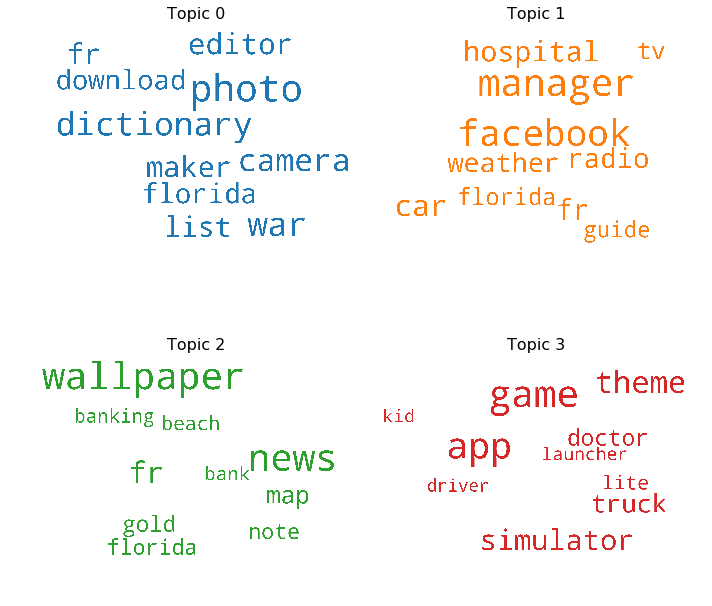

In [39]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning - Number of Topics and Alpha

In [40]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [41]:
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 0.001]
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        num_topics_range=num_topics_range, 
                                                        alpha_range=alpha_range)

In [42]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.010,2,0.709599
1,0.010,6,0.713743
2,0.010,10,0.722744
3,0.010,15,0.725679
4,0.010,20,0.708646
5,0.100,2,0.726943
6,0.100,6,0.720083
7,0.100,10,0.733727
8,0.100,15,0.737808
9,0.100,20,0.719623


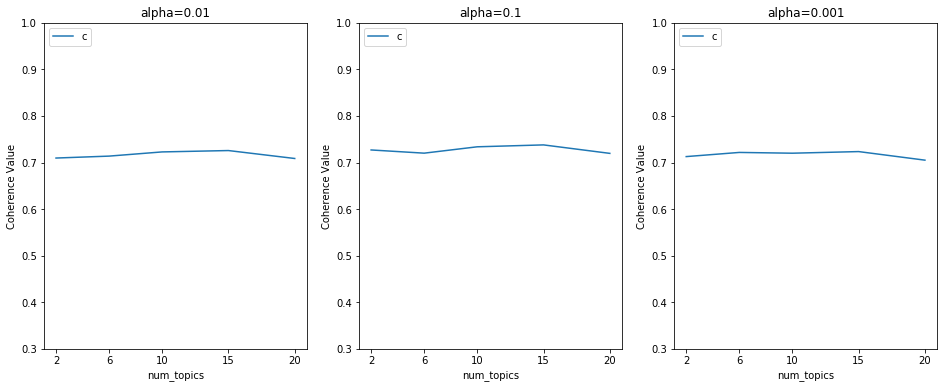

In [43]:
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [44]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           per_word_topics=True)

In [45]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.089*"map" + 0.087*"offline" + 0.076*"gold" + 0.062*"tv" + 0.048*"test" + '
  '0.044*"time" + 0.025*"voice" + 0.017*"speed" + 0.016*"movie" + 0.015*"run"'),
 (1,
  '0.075*"racing" + 0.054*"coupon" + 0.034*"shopping" + 0.024*"price" + '
  '0.011*"deal" + 0.009*"summer" + 0.003*"log" + 0.001*"discount" + '
  '0.000*"amazon" + 0.000*"bike"'),
 (2,
  '0.074*"phone" + 0.050*"color" + 0.036*"number" + 0.029*"text" + '
  '0.019*"princess" + 0.012*"sandbox" + 0.005*"pixel_art" + 0.003*"adult" + '
  '0.000*"pixel" + 0.000*"dialer"'),
 (3,
  '0.214*"theme" + 0.068*"launcher" + 0.062*"list" + 0.060*"note" + '
  '0.036*"search" + 0.033*"keyboard" + 0.029*"word" + 0.027*"travel" + '
  '0.015*"style" + 0.011*"neon"'),
 (4,
  '0.000*"fr" + 0.000*"florida" + 0.000*"mobile" + 0.000*"lottery" + '
  '0.000*"cruiser" + 0.000*"dictionary" + 0.000*"poker" + 0.000*"surgery" + '
  '0.000*"doctor" + 0.000*"radio"'),
 (5,
  '0.124*"kid" + 0.047*"song" + 0.036*"youtube" + 0.036*"fun" + 0.017*"pack" + '


In [46]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -20.102451254514214

Coherence Score:  0.5940564875048795


In [47]:
coherence_model_lda.get_coherence_per_topic()

[0.611185301820472,
 0.5753620031635694,
 0.5655655251333889,
 0.5327708580978106,
 0.7371302825252457,
 0.6279544345925313,
 0.5300861785727208,
 0.6779692903863065,
 0.5860268423081203,
 0.5576502786891544,
 0.573005319802457,
 0.5891197009357054,
 0.613520475049803,
 0.5749288658675801,
 0.5585719556283276]

In [48]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14    -0.341982  0.128672       1        1  10.215709
10    -0.104956 -0.336092       2        1   9.759853
9     -0.016930 -0.008279       3        1   9.398926
8      0.028049  0.017800       4        1   8.336687
0      0.047935  0.023349       5        1   7.183199
3      0.043771  0.023025       6        1   7.082085
12     0.047757  0.022956       7        1   6.038114
2      0.039704  0.017357       8        1   5.814694
1      0.039000  0.016993       9        1   5.672972
6      0.043815  0.019619      10        1   5.506574
5      0.041694  0.018427      11        1   5.503006
11     0.038852  0.016924      12        1   5.229377
13     0.034337  0.014661      13        1   4.892164
7      0.029704  0.012402      14        1   4.726155
4      0.029250  0.012187      15        1   4.640483, topic_info=     Category        Freq        Term       Total  loglift  logprob
8     Default  503.000000         app  503.000000  30.0000  30.0000
100   Default  426.000000        game  426.000000  29.0000  29.0000
55    Default  339.000000   wallpaper  339.000000  28.0000  28.0000
491   Default  374.000000  calculator  374.000000  27.0000  27.0000
11    Default  339.000000       theme  339.000000  26.0000  26.0000
847   Default  272.000000        news  272.000000  25.0000  25.0000
97    Default  248.000000       video  248.000000  24.0000  24.0000
1269  Default  240.000000   simulator  240.000000  23.0000  23.0000
105   Default  210.000000       truck  210.000000  22.0000  22.0000
305   Default  209.000000     manager  209.000000  21.0000  21.0000
26    Default  153.000000         kid  153.000000  20.0000  20.0000
304   Default  180.000000    facebook  180.000000  19.0000  19.0000
19    Default  134.000000       maker  134.000000  18.0000  18.0000
4     Default  167.000000       photo  167.000000  17.0000  17.0000
160   Default  145.000000         map  145.000000  16.0000  16.0000
285   Default  142.000000     offline  142.000000  15.0000  15.0000
10    Default  134.000000        lite  134.000000  14.0000  14.0000
445   Default  123.000000        gold  123.000000  13.0000  13.0000
43    Default  101.000000        room  101.000000  12.0000  12.0000
9     Default  110.000000    launcher  110.000000  11.0000  11.0000
110   Default  124.000000         car  124.000000  10.0000  10.0000
368   Default   98.000000       phone   98.000000   9.0000   9.0000
109   Default   96.000000      racing   96.000000   8.0000   8.0000
717   Default  101.000000          tv  101.000000   7.0000   7.0000
0     Default  114.000000      camera  114.000000   6.0000   6.0000
573   Default   88.000000         cam   88.000000   5.0000   5.0000
1010  Default  100.000000        list  100.000000   4.0000   4.0000
91    Default   88.000000        card   88.000000   3.0000   3.0000
1811  Default   96.000000        note   96.000000   2.0000   2.0000
1443  Default  112.000000         war  112.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
246   Topic15    0.194288       radio    2.262565   0.6154  -8.5814
1230  Topic15    0.194278         egg    2.259025   0.6170  -8.5814
1256  Topic15    0.194287      result    2.262378   0.6155  -8.5814
2769  Topic15    0.194277        form    2.258619   0.6171  -8.5814
297   Topic15    0.194319      mobile    2.276713   0.6094  -8.5812
3305  Topic15    0.194294     lottery    2.267715   0.6132  -8.5813
5098  Topic15    0.194279          fc    2.259967   0.6165  -8.5814
4866  Topic15    0.194286          ep    2.267031   0.6135  -8.5814
4276  Topic15    0.194280          db    2.262326   0.6155  -8.5814
812   Topic15    0.194280       event    2.262391   0.6155  -8.5814
1418  Topic15    0.194280      strike    2.262706   0.6153  -8.5814
143   Topic15    0.194276       meter    2.259528   0.6167  -8.5814
2618  Topic15    0.194280       audio    2.2639

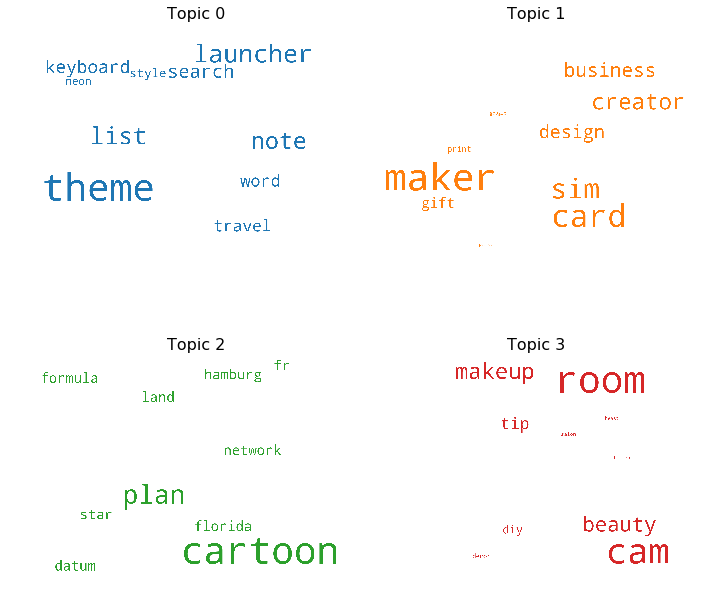

In [49]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()